In [2]:
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model  # Importing load_model from keras.models
import cv2
import matplotlib.pyplot as plt

In [5]:


cnn = load_model("/content/drive/MyDrive/Colab Notebooks/cv/saved_model1.h5")

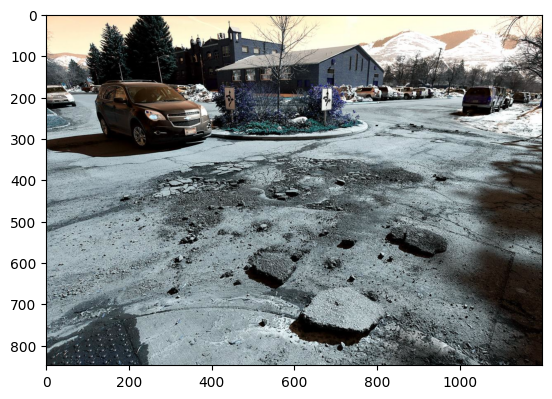

In [7]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/cv/dataset/pothels/12.jpg"))

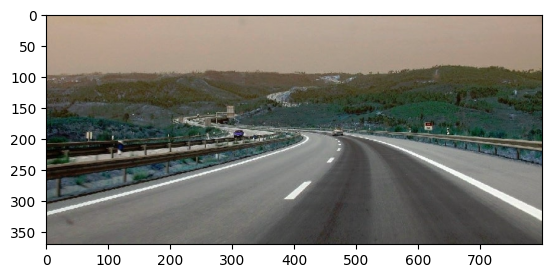

In [8]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/cv/dataset/normal/12.jpg"))

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cv/dataset', target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary', subset="training")

Found 166 images belonging to 2 classes.


In [10]:
validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/cv/dataset", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 40 images belonging to 2 classes.


In [11]:
cnn = tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
6/6 [==============================] - 41s 8s/step - loss: 0.6867 - accuracy: 0.5843 - val_loss: 0.6611 - val_accuracy: 0.5000
Epoch 2/25
6/6 [==============================] - 6s 1s/step - loss: 0.5995 - accuracy: 0.6687 - val_loss: 0.5478 - val_accuracy: 0.7750
Epoch 3/25
6/6 [==============================] - 7s 973ms/step - loss: 0.5208 - accuracy: 0.7530 - val_loss: 0.6081 - val_accuracy: 0.6500
Epoch 4/25
6/6 [==============================] - 5s 850ms/step - loss: 0.5187 - accuracy: 0.7289 - val_loss: 0.7343 - val_accuracy: 0.6000
Epoch 5/25
6/6 [==============================] - 6s 1s/step - loss: 0.5051 - accuracy: 0.7831 - val_loss: 0.4269 - val_accuracy: 0.8250
Epoch 6/25
6/6 [==============================] - 6s 1s/step - loss: 0.4913 - accuracy: 0.7048 - val_loss: 0.4097 - val_accuracy: 0.8750
Epoch 7/25
6/6 [==============================] - 5s 777ms/step - loss: 0.3844 - accuracy: 0.8614 - val_loss: 0.3372 - val_accuracy: 0.9000
Epoch 8/25
6/6 [===============

In [20]:
evaluation = cnn.evaluate_generator(validation_generator)

loss = evaluation[0]
accuracy = evaluation[1]

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

<ipython-input-20-4e2e4b73ead8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = cnn.evaluate_generator(validation_generator)


Validation Loss: 0.2197924554347992
Validation Accuracy: 0.875


1/1 [==============================] - 0s 24ms/step
normal


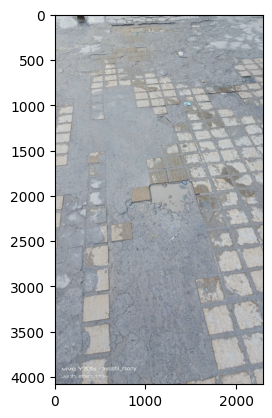

In [29]:
test_image = image.load_img("/content/drive/MyDrive/Colab Notebooks/cv/dataset/IMG_20230731_171446.jpg", target_size=(64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/cv/dataset/IMG_20230731_171446.jpg"))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'

print(prediction)


1/1 [==============================] - 0s 475ms/step


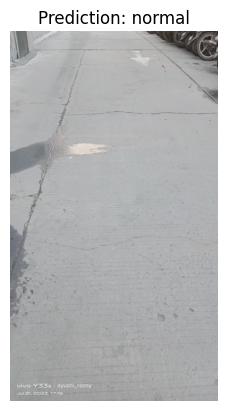

In [35]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("/content/drive/MyDrive/Colab Notebooks/cv/saved_model1.h5")

# Load and preprocess the test image
test_image = load_img("/content/drive/MyDrive/Colab Notebooks/cv/dataset/IMG_20230731_171923.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make the prediction
result = model.predict(test_image)

# Replace 'training_set.class_indices' with the actual mapping of class indices and labels
class_indices = {'normal': 0, 'pothole': 1}

# Map the class indices to class labels
if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'

# Display the image
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/cv/dataset/IMG_20230731_171923.jpg"))
plt.title(f"Prediction: {prediction}")
plt.axis('off')  # Hide the axis
plt.show()
